In [ ]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Let's see what we're working with
print("Training data shape:", train_data.shape)
print("\nFirst few rows:")
print(train_data.head())

Training data shape: (891, 12)

First few rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      

In [ ]:
print(train_data.columns)
# So target column is Survived

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
#EDA

# 1. Basic information about the dataset
print("\n=== DATA INFO ===")
print(train_data.info())

# 2. Check for missing values
print("\n=== MISSING VALUES ===")
print(train_data.isnull().sum())

# 3. Basic statistics
print("\n=== BASIC STATISTICS ===")
print(train_data.describe())

# 4. Survival rate (our target variable)
print("\n=== SURVIVAL RATE ===")
survival_rate = train_data['Survived'].value_counts()
print(survival_rate)
print(f"\nSurvival percentage: {train_data['Survived'].mean() * 100:.2f}%")


=== DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

=== MISSING VALUES ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin 

/tmp/ipython-input-4040229664.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Died', 'Survived'])


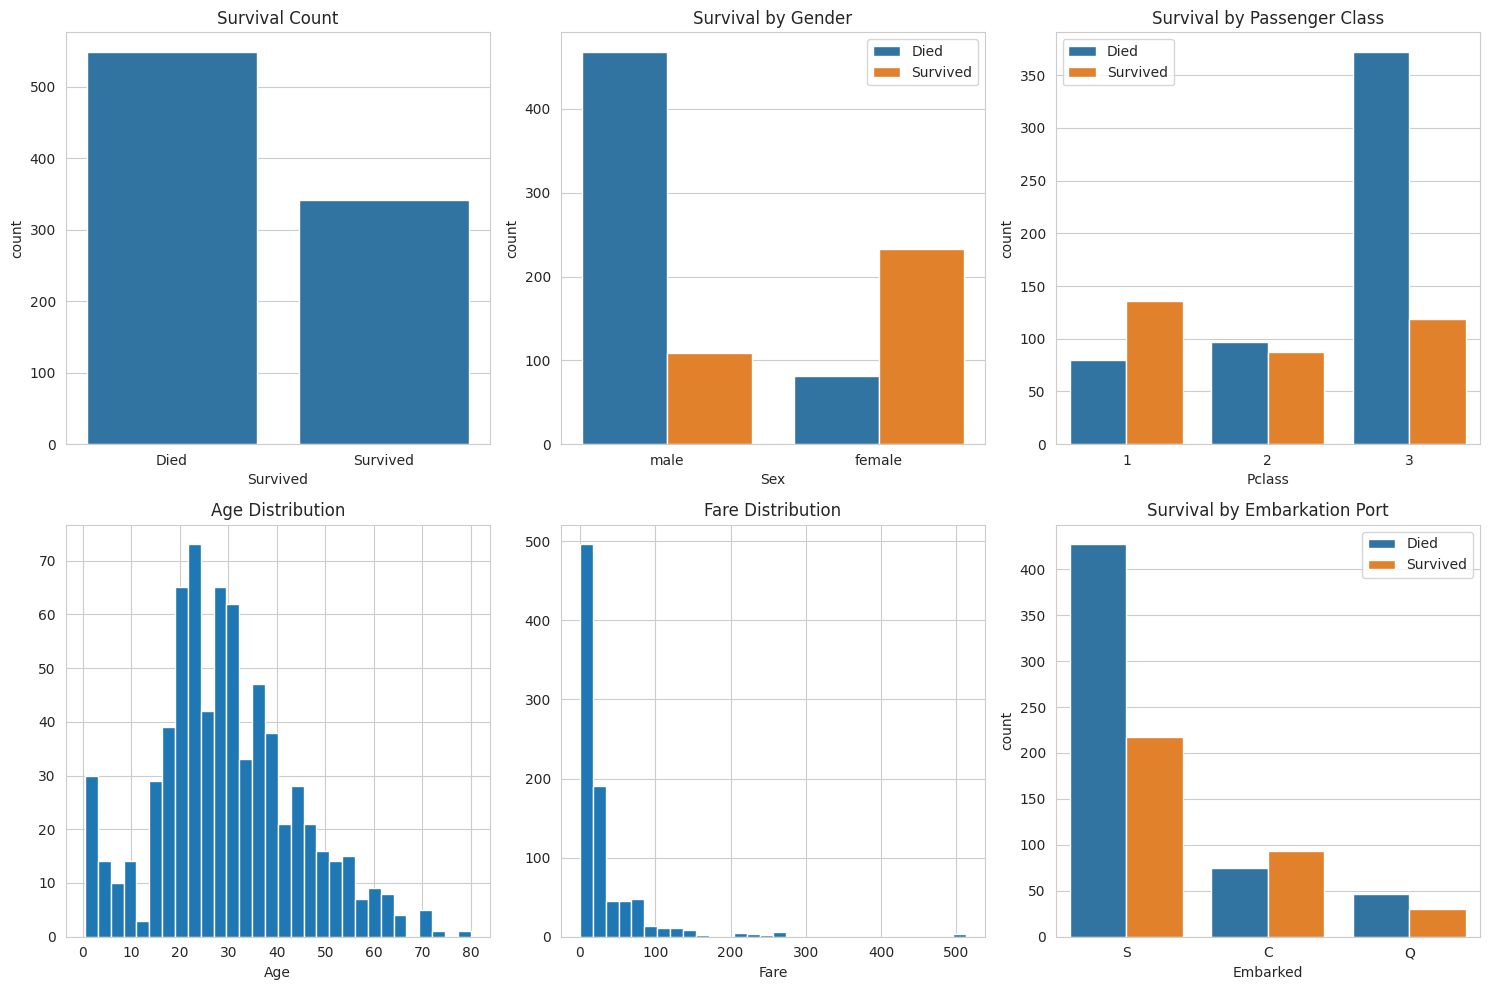


=== KEY INSIGHTS ===
Survival rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [ ]:
# Set up the plotting style
sns.set_style('whitegrid')

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Survival count
sns.countplot(data=train_data, x='Survived', ax=axes[0, 0])
axes[0, 0].set_title('Survival Count')
axes[0, 0].set_xticklabels(['Died', 'Survived'])

# 2. Survival by Gender
sns.countplot(data=train_data, x='Sex', hue='Survived', ax=axes[0, 1])
axes[0, 1].set_title('Survival by Gender')
axes[0, 1].legend(['Died', 'Survived'])

# 3. Survival by Passenger Class
sns.countplot(data=train_data, x='Pclass', hue='Survived', ax=axes[0, 2])
axes[0, 2].set_title('Survival by Passenger Class')
axes[0, 2].legend(['Died', 'Survived'])

# 4. Age distribution
train_data['Age'].hist(bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution')
axes[1, 0].set_xlabel('Age')

# 5. Fare distribution
train_data['Fare'].hist(bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Fare Distribution')
axes[1, 1].set_xlabel('Fare')

# 6. Survival by Embarkation Port
sns.countplot(data=train_data, x='Embarked', hue='Survived', ax=axes[1, 2])
axes[1, 2].set_title('Survival by Embarkation Port')
axes[1, 2].legend(['Died', 'Survived'])

plt.tight_layout()
plt.show()

# Additional insights
print("\n=== KEY INSIGHTS ===")
print(f"Survival rate by Gender:\n{train_data.groupby('Sex')['Survived'].mean()}")
print(f"\nSurvival rate by Class:\n{train_data.groupby('Pclass')['Survived'].mean()}")

In [ ]:
# Function to clean our data
def clean_data(df):
    """Clean and prepare the data for modeling"""

    # Make a copy to avoid changing original data
    data = df.copy()

    # 1. Fill missing Age values with median age
    data['Age'] = data['Age'].fillna(data['Age'].median())

    # 2. Fill missing Embarked with mode
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

    # 3. Fill missing Fare with median
    data['Fare'] = data['Fare'].fillna(data['Fare'].median())

    # 4. Convert Sex to numbers (Male=1, Female=0)
    data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

    # 5. Convert Embarked to numbers
    data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

    return data

# Clean both datasets
train_clean = clean_data(train_data)
test_clean = clean_data(test_data)

print("Data cleaning complete!")
print("\nMissing values after cleaning:")
print(train_clean[['Age', 'Embarked', 'Fare', 'Sex']].isnull().sum())

Data cleaning complete!

Missing values after cleaning:
Age         0
Embarked    0
Fare        0
Sex         0
dtype: int64


In [ ]:
# Select features we want to use
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Separate features (X) and target (y)
X = train_clean[features]
y = train_clean['Survived']

# Split data into training and validation sets
# This helps us check how well our model works
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)

Training set size: (712, 7)
Validation set size: (179, 7)


In [ ]:
# Create and train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

print("Model trained successfully! ✓")

# Let's see which features are most important
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n=== FEATURE IMPORTANCE ===")
print(feature_importance)

Model trained successfully! ✓

=== FEATURE IMPORTANCE ===
    Feature  Coefficient
1       Sex    -2.581480
0    Pclass    -0.958122
3     SibSp    -0.302837
6  Embarked     0.222565
4     Parch    -0.100614
2       Age    -0.031162
5      Fare     0.002862



=== MODEL PERFORMANCE ===
Accuracy: 79.89%

Classification Report:
              precision    recall  f1-score   support

        Died       0.82      0.85      0.83       105
    Survived       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



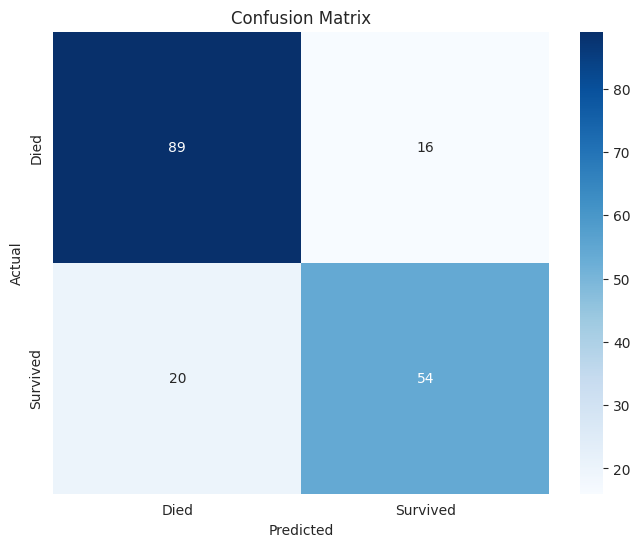


Confusion Matrix Explanation:
True Negatives (Correctly predicted deaths): 89
False Positives (Incorrectly predicted survivals): 16
False Negatives (Incorrectly predicted deaths): 20
True Positives (Correctly predicted survivals): 54


In [ ]:
# Make predictions on validation set
y_pred = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"\n=== MODEL PERFORMANCE ===")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=['Died', 'Survived']))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks([0.5, 1.5], ['Died', 'Survived'])
plt.yticks([0.5, 1.5], ['Died', 'Survived'])
plt.show()

print("\nConfusion Matrix Explanation:")
print(f"True Negatives (Correctly predicted deaths): {cm[0, 0]}")
print(f"False Positives (Incorrectly predicted survivals): {cm[0, 1]}")
print(f"False Negatives (Incorrectly predicted deaths): {cm[1, 0]}")
print(f"True Positives (Correctly predicted survivals): {cm[1, 1]}")

In [ ]:
# Prepare test data
X_test = test_clean[features]

# Make predictions
test_predictions = model.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

# Save to CSV
submission.to_csv('/content/titanic_predictions.csv', index=False)
print("\nPredictions saved to 'my_titanic_predictions.csv'")
print(f"\nPredicted survival rate: {test_predictions.mean() * 100:.2f}%")


Predictions saved to 'my_titanic_predictions.csv'

Predicted survival rate: 37.32%


In [ ]:
print("\n" + "="*50)
print("KEY FINDINGS FROM ANALYSIS")
print("="*50)

# 1. Gender impact
print("\n1. GENDER:")
print(f"   - Female survival rate: {train_data[train_data['Sex']=='female']['Survived'].mean()*100:.1f}%")
print(f"   - Male survival rate: {train_data[train_data['Sex']=='male']['Survived'].mean()*100:.1f}%")
print("   → Women had MUCH higher survival rates")

# 2. Class impact
print("\n2. PASSENGER CLASS:")
for pclass in [1, 2, 3]:
    rate = train_data[train_data['Pclass']==pclass]['Survived'].mean()*100
    print(f"   - Class {pclass} survival rate: {rate:.1f}%")
print("   → Higher class = better survival chances")

# 3. Age impact
survived_age = train_data[train_data['Survived']==1]['Age'].mean()
died_age = train_data[train_data['Survived']==0]['Age'].mean()
print(f"\n3. AGE:")
print(f"   - Average age of survivors: {survived_age:.1f} years")
print(f"   - Average age of non-survivors: {died_age:.1f} years")

# 4. Family size
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
print(f"\n4. FAMILY SIZE:")
print(f"   - Correlation with survival: {train_data[['FamilySize', 'Survived']].corr().iloc[0,1]:.3f}")

print("\n" + "="*50)


KEY FINDINGS FROM ANALYSIS

1. GENDER:
   - Female survival rate: 74.2%
   - Male survival rate: 18.9%
   → Women had MUCH higher survival rates

2. PASSENGER CLASS:
   - Class 1 survival rate: 63.0%
   - Class 2 survival rate: 47.3%
   - Class 3 survival rate: 24.2%
   → Higher class = better survival chances

3. AGE:
   - Average age of survivors: 28.3 years
   - Average age of non-survivors: 30.6 years

4. FAMILY SIZE:
   - Correlation with survival: 0.017

